## Simpson's paradox

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

### Model Definition

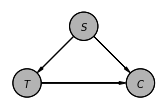

In [2]:
model = BayesianModel([('S', 'T'), ('T', 'C'), ('S', 'C')])
model.to_daft(node_pos={'T': (0, 0), 'C': (2, 0), 'S': (1, 1)}).render()

In [3]:
cpd_s = TabularCPD(variable='S',
                   variable_card=2,
                   values=[[0.5],
                           [0.5]],
                   state_names={'S': ['m', 'f']})
cpd_t = TabularCPD(variable='T',
                   variable_card=2,
                   values=[[0.25, 0.75],
                           [0.75, 0.25]],
                   evidence=['S'],
                   evidence_card=[2],
                   state_names={'S':['m', 'f'], 'T':[0, 1]})
cpd_c = TabularCPD(variable='C',
                   variable_card=2,
                   values=[[0.3, 0.4, 0.7, 0.8],
                           [0.7, 0.6, 0.3, 0.2]],
                   evidence=['S', 'T'],
                   evidence_card=[2, 2],
                   state_names={'S': ['m', 'f'], 'T': [0, 1], 'C': [0, 1]})

model.add_cpds(cpd_s, cpd_t, cpd_c)

### Inference conditioning on T

In [4]:
# Non adjusted inference
infer_non_adjust = VariableElimination(model)
print(infer_non_adjust.query(variables=['C'], evidence={'T': 1}))
print(infer_non_adjust.query(variables=['C'], evidence={'T': 0}))

Eliminating: S: 100%|██████████| 1/1 [00:00<00:00, 199.20it/s]

Finding Elimination Order: :   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Eliminating: S: 100%|██████████| 1/1 [00:00<00:00, 280.86it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+


### Inference with do-operation on T

In [5]:
infer_adjusted = CausalInference(model)
print(infer_adjusted.query(variables=['C'], do={'T': 1}))
print(infer_adjusted.query(variables=['C'], do={'T': 0}))

Eliminating: S: 100%|██████████| 1/1 [00:00<00:00, 134.00it/s]

Finding Elimination Order: :   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Eliminating: S: 100%|██████████| 1/1 [00:00<00:00, 117.88it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
